In [2]:
# 이미지 변환 - 회전 및 대칭
# - 데이터 부족 시 데이터 증가를 위해서 사용함
# - 대칭 : 좌우상하 flip()
# - 회전 : 지정된 각도로 돌리기 getRotationMatrix2D()

In [3]:
import cv2
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import os

In [4]:
img_dir = '../image/'
filename = 'UR (15).jpg'

In [5]:
# 이미지 로딩 (경로 + 파일명)
color_img = cv2.imread(img_dir + filename, cv2.IMREAD_COLOR)

In [6]:
# 기본 정보 확인
print(f'형태 : {color_img.shape}')   # (행, 열, 채널[차원])
print(f'차원 : {color_img.ndim}')
print(f'타입 : {color_img.dtype}')


형태 : (360, 600, 3)
차원 : 3
타입 : uint8


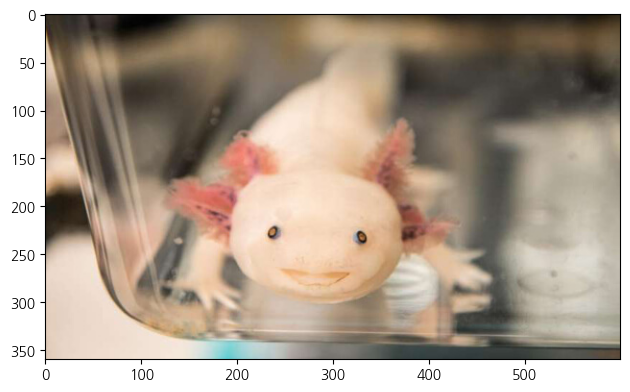

In [7]:
# 시각화로 확인
UR = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

plt.imshow(UR)
plt.tight_layout()
plt.show()

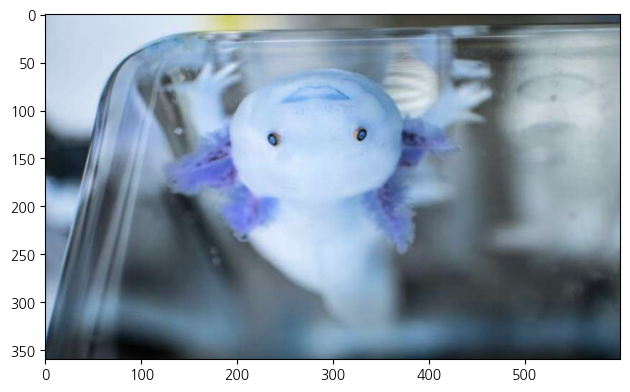

In [8]:
# 이미지 상하좌우 대칭
# 상하 flip : 0 지정
updown_img = cv2.flip(color_img, 0)

plt.imshow(updown_img)
plt.tight_layout()
plt.show()

In [9]:
# 좌우 flip : 1 지정 
RL_img = cv2.flip(color_img, 1)

plt.imshow(cv2.cvtColor(RL_img, cv2.COLOR_BGR2RGB))
plt.grid()
plt.tight_layout()
plt.show()

In [10]:
# 상하좌우 flip : -1 지정 
Allflip_img = cv2.flip(color_img, -1)

plt.imshow(Allflip_img)
plt.grid()
plt.tight_layout()
plt.show()

In [11]:
# 이미지 회전

# 1. 회전행렬 추출 단계
# 문법 : getRotationMarix2D(center,angle,scale)
# center : 회전 축 중심 좌표
# angle : 회전 각도
# scale : 확대/축소 배율 

# 2. 변화 단계
# 문법 : warpAffine(원본 이미지, 회전행렬, (행,열))

In [30]:
# 회전행렬 추출

# 현재 이미지 크기 확인
H, W, _ = color_img.shape
print(f'H : {H}, W : {W}')

rm45 = cv2.getRotationMatrix2D((W/2, H/2), 45, 0.8)

H : 360, W : 600


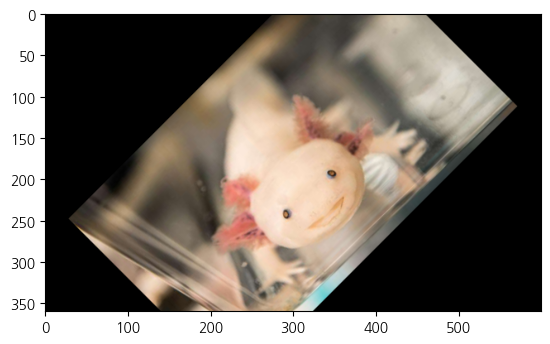

In [31]:
# 이미지 변환 
rm45_img = cv2.warpAffine(color_img, rm45, (W,H))

plt.imshow(cv2.cvtColor(rm45_img, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
# 여러 각도로 회전 및 출력
angles = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]  # 원하는 각도 리스트
for angle in angles:
    # 회전 변환 행렬 생성
    rm = cv2.getRotationMatrix2D((W/2, H/2), angle, 0.5)
    
    # 이미지 회전
    rotated_img = cv2.warpAffine(color_img, rm, (W, H))

    # 회전된 이미지를 출력하거나 저장
    cv2.imshow(f"Rotated by {angle} degrees", rotated_img)
    
    # 각도별로 이미지를 파일로 저장
    cv2.imwrite(f"rotated_{angle}.jpg", rotated_img)
    
cv2.waitKey(0)
cv2.destroyAllWindows()